In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Datasets
path = "./datasets/accepted_2007_to_2018Q4.csv"
dataset_accept = pd.read_csv(path)

/var/folders/v0/9xd212bx5wq454d4gnddf1rm0000gn/T/ipykernel_89477/4056628032.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_accept = pd.read_csv(path)


In [3]:
limitPer = len(dataset_accept) * .70
dataset = dataset_accept.dropna(thresh=limitPer, axis=1)


In [4]:
dataset["loan_status"].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [5]:
dataset = dataset[(dataset["loan_status"] == "Fully Paid") | (dataset["loan_status"] == "Charged Off")]
dataset.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [6]:
#Top 5 columns with highest count of 0 rows
dataset[dataset == 0].count(axis=0).sort_values(ascending = False).head(5)

out_prncp                   1345310
out_prncp_inv               1345310
delinq_amnt                 1340311
acc_now_delinq              1338972
chargeoff_within_12_mths    1334414
dtype: int64

In [7]:
#remove rows with more than 70% of 0 values
dataset = dataset.loc[:, 0.7 > (dataset==0).mean()]

In [8]:
#drop columns unnecessary for the model
dataset = dataset.drop(["id","url"], axis = 1)

In [9]:
dataset["term_in_months"] = dataset["term"].str.extract('(\d+)')
dataset["emp_length_in_years"] = dataset["emp_length"].str.extract('(\d+)')

In [10]:
dataset = dataset.drop(["term", "emp_length"], axis = 1)

In [ ]:
features_to_use = ["loan_amnt", "funded_amnt", "int_rate", "installment", "sub_grade"
, "home_ownership", "annual_inc", "verification_status", "fico_range_high", "purpose", "pymnt_plan", "mths_since_recent_inq", "term_in_months", "emp_length_in_years"
, "addr_state"]

In [32]:
dataset.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'policy_code', 'application_type', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_t

<Axes: >

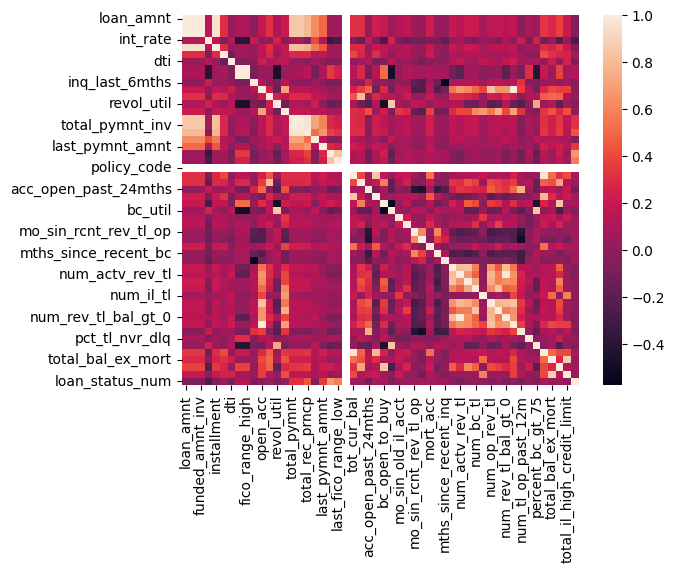

In [12]:
#correlation only takes numeric data
numeric_data = dataset.select_dtypes(include='number')
#add a numeric category of loan status where 1 if 'Fully Paid' and 0 if 'Charged Off'
numeric_data['loan_status_num'] = dataset['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data_corr = numeric_data.corr()
sns.heatmap(data_corr)

In [13]:
#Columns with highest correlation to loan_status 
data_corr['loan_status_num'].sort_values(ascending = False).head(15)

loan_status_num         1.000000
last_fico_range_high    0.667842
last_fico_range_low     0.575706
total_rec_prncp         0.438944
last_pymnt_amnt         0.347385
total_pymnt             0.315180
total_pymnt_inv         0.314751
fico_range_low          0.130683
fico_range_high         0.130682
bc_open_to_buy          0.082044
avg_cur_bal             0.078924
tot_hi_cred_lim         0.078473
mort_acc                0.075294
total_bc_limit          0.072171
tot_cur_bal             0.071206
Name: loan_status_num, dtype: float64